# Intro to Scientific Computing

### Homework 4

NAMES: Rajdipa Chowdhury, Scott Itakura , Tyler Stewart

DATE: 11/01/17

In [11]:
% matplotlib inline
from numpy import *
from matplotlib.pyplot import *

# Evaluate this cell to define some constants (cgs units) 
AU = 1.49597870e+13  # cm 
MSun = 1.98911e+33   # g 
RSun = 6.955e10
Mearth = 5.99219e+27 # g
Rearth = 6.371e+8    # cm
SecInDay = 86400.
SecInYear = SecInDay*365.25
kB=1.3807e-16       # erg / K 
avro=6.022141e+23   # particles per mole
Lsun=3.839e+33      # erg/s
sigmaB = 5.6704e-5  # erg / cm^2 / s / K^4
h = 6.6260755e-27   # erg s 
c = 2.99e10         # cm/s

## Blackbody radiation


When this black body is in thermal equilibrium (has a constant temperature $T$) it means that the radiation "trapped" inside also is. 

* Photons absorbed by the blackbody interact with each other and with matter composing the blackbody.
* This interaction with photons changes the material's temperature.
* If the blackbody is to reach thermodynamical equilibrium, the number of photons absorbed, emitted and scattered has to reach some equilibrium.
* This means that the distribution of photons (# photons with a certain energy) reaches an equilibrium

** This translates into a spectrum of electromagnetic radiation that can be characterized by the temperature of the blackbody. **

Radiation emitted by a blackbody in thermodynamic equilibrium is described by Planck's law, which depends on the temperature $T$ of the body and describes the amount of energy radiated per unit area, per unit wavelength, per unit solid angle for a given temperature $T$. Its units in CGS are [erg s$^{-1}$ cm$^{-2}$ cm$^{-1}$ sr^$-1$] = [erg s$^{-1}$ cm$^{-3}$ sr^$-1$].

$$
\large
B_{\lambda}=\frac{2hc^2}{\lambda^5}\left(\frac{1}{\exp\left(\frac{hc}{\lambda k_{b}T}\right)-1}\right)
$$

It can also be written in terms of the frequency:

$$
\large
B_{\nu}=\frac{2h\nu^3}{c^2}\left(\frac{1}{\exp\left(\frac{h\nu}{k_{b}T}\right)-1}\right)
$$


One important feature of a blackbody is that it emits radiation isotropically, i.e. emits the same amount of energy in all directions.



## Finding the wavelength of maximum radiance of a blackbody

Obtain the maximum of Planck's function $B_{\lambda}$ as a function of $\lambda$. **Hint: Re define write Planck's function as**

$$
B_{\lambda}(x) = \left(\frac{2(kT)^5}{h^4 c^3}\right)\frac{x^{5}}{e^x - 1}
$$

where, 

$$
x = \frac{hc}{\lambda k T}
$$

* Make a plot $B_{\lambda}$ as function of $\lambda$ with $\lambda$ in  $[10,2000]$ nm, assuming $T = 5777$ K. `X` axis should have $\lambda$ in nm ($10^{-9}$ m) and $B_{\lambda}$ will remain in CGS. Be careful with the units (all quantities used in $B_{\lambda}$ is in CGS). 


* Explain how would you obtain the maximum of $B_{\lambda}$ (as function of $\lambda$) from Planck's function. Use a "markdown" cell to write your method.



20000
[  1.00000000e-06   1.00995050e-06   1.01990100e-06 ...,   1.99980099e-04
   1.99990050e-04   2.00000000e-04]
20000
[ -1.25313936e+13  -1.25313936e+13  -1.25313936e+13 ...,  -1.83396560e+12
  -1.83596564e+12  -1.83796525e+12]


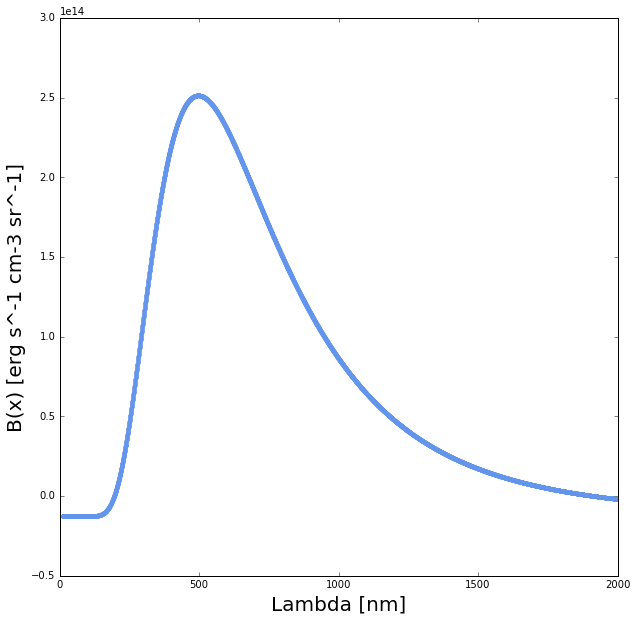

In [12]:
lam=(linspace(10,2000,20000)*10**-7) #nm to cm for the purpose of calculations. More Npoints added by Tyler to make plotting possible.
T=5777

x=((h)*(c))/((lam)*(kB)*(T))
B=(((2)*(kB*T)**5)/((h**4)*(c**3))*((x**5)/(e**x)-1))
#Our variables made by Tyler and Scot

print len(lam)
print lam

print len(B) #Making sure the data has the same amount of points within the lists.
print B

def Planck(x):    
    return (((2)*(kB*T)**5)/((h**4)*(c**3))*((x**5)/(e**x)-1))
#Our Planck function made fro the given equation made by scot
B = Planck(x)

fig = figure(figsize=(10,10)) #Plot made by Scot
plot(lam/10**-7,Planck(x),'.',color='cornflowerblue') #cm back to nm for the plot
xlabel("Lambda [nm]",fontsize=20)
ylabel("B(x) [erg s^-1 cm-3 sr^-1]",fontsize=20)

we are trying to find the wavelength of maximum radiance. to do so I used the first derivative test. I  defined a function dPlanck(x) to return the first derivative of Planck(x). I plotted that wrt x to find where the function (dPlanck) goes to zero. I found the range and then used the bisect method to find the value of x where dPlanck goes to zero. After getting that, I used the relation provided for x and lamda to calculate the value for lamda wrt the x I got from using the biscet function. and to obtain the value for max Blambda I would call the Planck(x) function and use my xmax as the argument.   

4.96511423174
the value of lambda for which Blambda has the maximum value is(in cm) 5.00260982043e-05
the maximum value of Blambda is(unit is in cgs) 2.51298427447e+14


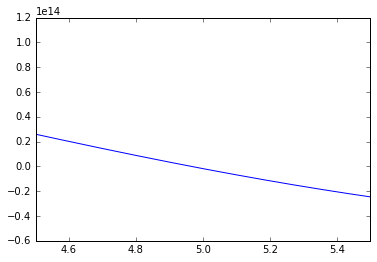

In [3]:
#defining a function to return the 1st derivative of Planck(x) aka The B(x)
#This cell was made by Rajdipa
A = (2*(kB*T)**5)/((h**4)*(c**3))
def dPlanck(x):
    return ((A*((5*(x**4))*((e**x)-1)- ((e**x)*(x**5))))/(((e**x)-1)**2))

plot(x,dPlanck(x))
xlim((4.5,5.5))
from scipy.optimize import bisect
print bisect(dPlanck,4.5,5.5) #we get the required value for x
xmax = bisect(dPlanck,4.5,5.5) 
lambdamax = ((h*c)/(xmax*kB*T))
print "the value of lambda for which Blambda has the maximum value is(in cm)" , lambdamax 
print "the maximum value of Blambda is(unit is in cgs)" , Planck(xmax)


## The total luminosity of a Blackbody

The luminosity of a spherical blackbody (BB) of radius $R$ can be obtained by integrating the radiation emitted by the BB in all posible directions:

\begin{equation}
\begin{split}
L_{\lambda}&=\int_{0}^{\pi} \int_{0}^{2\pi} (\pi B_{\lambda}) \sin\theta\ d\theta\ d\phi \\
\\
&=4\pi^2 R^2 B_{\lambda} 
\end{split}
\end{equation}

And then integrating this quantity over all possible wavelengths:

$$
L_{\rm tot} = \int_{0}^{\infty}L_{\lambda}\ d\lambda
$$

Then we have that:

\begin{equation}
L_{\rm tot} = 4\pi^2 R^2 \int_{0}^{\infty} \ B_{\lambda} \ d\lambda
\end{equation}

The integral can be done analytically to obtain:

\begin{equation}
\int_{0}^{\infty} \ B_{\lambda} \ d\lambda = \frac{\sigma T^{4}}{\pi}
\end{equation}

where $\sigma$ is the Steffan-Boltzmann constant. Thus, the total luminosity is: 

\begin{equation}
L_{\rm tot} = 4\pi R^2 \sigma T^{4}
\end{equation}



* Assuming $T = 5777$, and using Montecarlo integration, obtain $\int_{0}^{\infty} \ B_{\lambda} \ d\lambda$.

    * Since you can't use the interval $[0,\infty]$ for your calculation, you'll have to settle with computing the integral in a finite interval $(a,b)$.
        * Try using an interval similar to the one you used for your plot (remember to be careful with using the right units). **How does your result changes as you change the interval $(a,b)$?**
        * Choose an interval that gives you a decent result (you can always compare with the analytic solution).

    * Change the number of points you use to sample the "box".
        * How many points are required to get a result within 1% of the analytical result? 
        
* Do the same using the trapezoidal method.
    * Change the number of "rectangles" used in the integration
    * Change the interval $(a,b)$.

* Using your result from $\int_{0}^{\infty} \ B_{\lambda} \ d\lambda$ using the Montecarlo or the trapezois method, obtain $L_{tot}$ for $R = 6.955\times10^{10}$ cm.




In [4]:
#Analytic Method 
R = (6.955*10**10)/10**-7
L_total = 4*pi*(R**2)*(sigmaB*10**7)*(T**4) #converting sigma B from cm to nm 
print L_total


3.83908120693e+54


Area under f(x) =  1.31864164136e+15  in (1.00,15.00)


1318641641355384.8

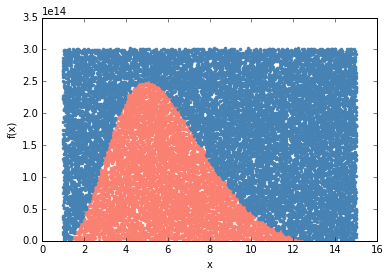

In [5]:
def Montecarlo_int(f,a,b,Npoint = 5000,plotf = False):
    """
    Receives:
    f -> python function to be integrated in (a,b)
    a -> starting point of (a,b)
    b -> ending point of (a,b)
    Npoint -> number of random points in (a,b)x(0,d)
    """

    # find the maximum of f(x) in (a,b)
    x_a = linspace(a,b)
    f_a = f(x_a)
    fmax = max(f_a)*1.2
    
    # Set d for interval (0,d)
    c = 0.0
    d = fmax
    
    # create random points
    x = random.uniform(a,b,Npoint)  # creates Npoint random points in (0,1)
    y = random.uniform(c,d,Npoint)  # creates Npoint random points in (0,1)

    # find points under f(x)
    below_f = y <= f(x)
    above_f = y > f(x)

    # decide if we want to plot or not
    if plotf:
        plot(x[below_f],y[below_f],'.',color = 'Salmon')
        plot(x[above_f],y[above_f],'.',color = 'steelBlue')
        xlabel('x')
        ylabel('f(x)')
        
    # get area under f(x) in (a,b)
    Abox = (b-a)*(d-c)
    Nunder = len(x[below_f])

    Integral = Abox*(float(Nunder)/Npoint)

    print 'Area under f(x) = ', Integral, ' in (%.2f,%.2f)'%(a,b)

    return Integral


Montecarlo_int(Planck,1,15,20000,plotf=True) #Montecarlo method used to find the area under the curve. Bounds had to be adjusted .
#Original bounds where 1 to 2000 which created an ugly plot which was impossible to read. These small bounds give a more exact answer.

1.32322664235e+15


1323226642349817.5

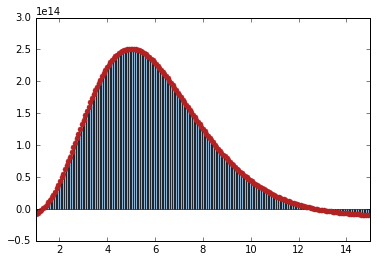

In [6]:
def Integ_trapz(f,a,b,Npoints):  
    '''
    Function to obtain the integral of f(x) from (a,b) using the trapezoidal method
    
    This functions receives:
    f -> function f(x) to be integrated
    a -> starting point of the interval (a,b) to be integrated
    b -> ending point of the interval (a,b) to be integrated
    Npoints -> number of points used to sample (a,b)
    
    Returns:
    Area -> Area under f(x) from (a,b)    
    '''

    x = linspace(a,b,Npoints)   # Define the array to sample (a,b)
    dx = x[1] - x[0]            # Obtain dx
    
    x_mid = (x[1:] + x[0:-1])/2.  # Obtain midpoint
    f_mid = (f(x[1:]) + f(x[0:-1]) )/2.  # Obtain approx f(x) at midpoint (f(a) + f(b))/2

    Area_rectangles = f_mid*dx  # array containing the area of each rectangle
    Area = sum(Area_rectangles)  # Sum of the area of all rectangles 

    print Area  # print Area on screen
      
        
# Here we decide whether we will make a plot or not. (If Npoints > 200 it won't make a plot)
    if Npoints <= 200:
        
        plot(x_mid,f_mid,'.',color='firebrick',markersize=10)
        plot(x_mid,f_mid,':',color='firebrick',lw=3)
    
        
        bar(x[:-1],f_mid,dx,color='steelblue',alpha=0.6) # alpha defines the opacity of the color
        # bar plots a rectangle with base x_i to x_i + dx and height y_i
        # using the arrays "x" and "y" and the distance between x elements dx
        
        xlim(a,b)     # Set limits in X

    return Area


Integ_trapz(Planck,1,15,200) #Using smaller bounds in both the trapezoid and montecarlo methods give a more exact value.
#These values aslo have similar orders of magnitude and are vert close numerically.

Area under f(x) =  1.3268752347e+15  in (1.00,15.00)
1.32322664235e+15


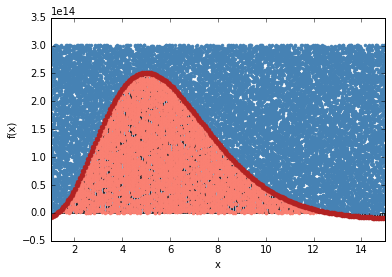

In [7]:
M = Montecarlo_int(Planck,1,15,20000,plotf=True)
T = Integ_trapz(Planck,1,15,200)

In [10]:
print M*4*(pi**2)*(R**2)
print T*4*(pi**2)*(R**2)
print L_total  #the analytic value

2.53386862322e+52
2.52690108518e+52
3.83908120693e+54


In [9]:
#The difference in these values is likely due to the range of the Integration functions 
#Integration methods where fine tuned by Scot and Tyler